In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 노란색 글씨의 warining 문구 강제 생략
import warnings
warnings.filterwarnings(action='ignore')
    

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)


    

numpy version -  1.21.5
pandas version -  1.4.2


In [6]:
tmp_frm = pd.read_excel('C:/Users/a/Documents/SQL/data/visual/시도별 전출입 인구수.xlsx' 
                        , header = 0 )
tmp_frm.head()



,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,NaN,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,NaN,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [8]:
# nan으로 비어있는 값을 첫번째 값으로 채운다.

tmp_frm = tmp_frm.fillna(method = 'ffill')
tmp_frm.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [11]:
tmp_frm[tmp_frm['전입지별'] == '서울특별시'].index
seoul_frm = tmp_frm[tmp_frm['전출지별'] == '서울특별시'][tmp_frm[tmp_frm['전출지별'] == '서울특별시']['전입지별'] != '서울특별시']
seoul_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,서울특별시,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,서울특별시,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,서울특별시,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [12]:
seoul_frm.drop('전출지별' , axis = 1 , inplace = True)
seoul_frm.rename(columns = {seoul_frm.columns[0] : '전입지'} , inplace = True)
seoul_frm

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,26700.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [13]:
seoul_frm.set_index('전입지' , inplace=True)
seoul_frm

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0


- area plot

In [15]:
print('충청남도, 경상북도, 강원도, 전라남도 인구데이터만 선택')
print('년도 1970~2017 정수라벨')

충청남도, 경상북도, 강원도, 전라남도 인구데이터만 선택
년도 1970~2017


In [30]:
seoul_frm.columns = seoul_frm.columns.astype(int)
subset_frm = seoul_frm.loc[['충청남도' , '경상북도' , '강원도' , '전라남도'] , :]
subset_frm

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954.0,18943.0,23406.0,27139.0,25509.0,51205.0,41447.0,43993.0,48091.0,45388.0,...,27458.0,24889.0,24522.0,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,11868.0,16459.0,22073.0,27531.0,26902.0,46177.0,40376.0,41155.0,42940.0,43565.0,...,15425.0,16569.0,16042.0,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,26700.0,27599.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,10513.0,16755.0,20157.0,22160.0,21314.0,46610.0,46251.0,43430.0,44624.0,47934.0,...,16601.0,17468.0,16429.0,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [35]:
## map
## 내부 형변환 가능
a = [1.2, 2.5, 3.7, 4.6]
a = list(map(int, a))
a
[1, 2, 3, 4]

[1, 2, 3, 4]

In [40]:
t_seoul_frm = subset_frm.T
t_seoul_frm

전입지,충청남도,경상북도,강원도,전라남도
1970,15954.0,11868.0,9352.0,10513.0
1971,18943.0,16459.0,12885.0,16755.0
1972,23406.0,22073.0,13561.0,20157.0
1973,27139.0,27531.0,16481.0,22160.0
1974,25509.0,26902.0,15479.0,21314.0
1975,51205.0,46177.0,27837.0,46610.0
1976,41447.0,40376.0,25927.0,46251.0
1977,43993.0,41155.0,25415.0,43430.0
1978,48091.0,42940.0,26700.0,44624.0
1979,45388.0,43565.0,27599.0,47934.0


area plot - 




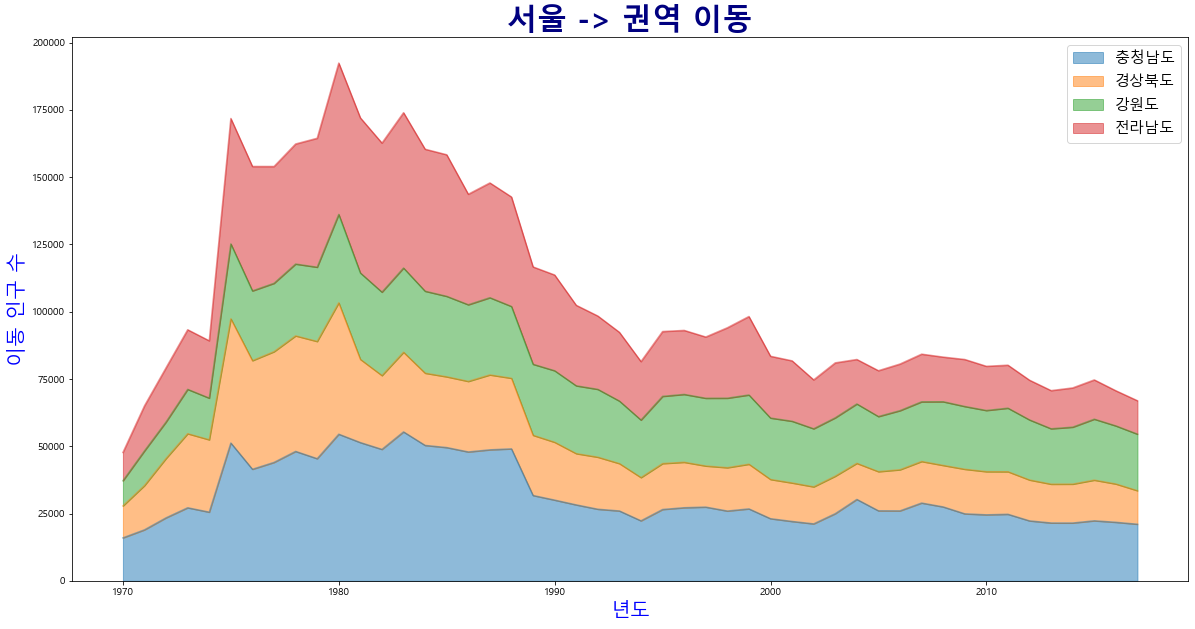

<function matplotlib.pyplot.close(fig=None)>

In [51]:
### 면적 그래프
# alpha = ''    투명도
# stacked = T/F 누적 그래프 T/F
# weight = ''   글자 두께

print('area plot - ')
print()
print()

t_seoul_frm.plot(kind = 'area' , figsize = (20,10) , alpha = 0.5 , stacked = True)
plt.title('서울 -> 권역 이동' , size = 30 , color = 'navy' , weight = 'bold')
plt.ylabel('이동 인구 수' , size = 20 , color = 'blue')
plt.xlabel('년도' , size = 20 , color = 'blue')
plt.legend(loc='best' , fontsize=15)
plt.show()
plt.close

- bubble plot

In [58]:
mpg_frm = pd.read_excel('C:/Users/a/Documents/SQL/data/visual/mpg_visualization.xlsx' 
                        , header=0 
                        , usecols = "A:L"
                        , index_col = 0)
mpg_frm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [64]:
auto_mpg_frm = pd.read_csv('C:/Users/a/Documents/SQL/data/visual/auto-mpg.csv' 
                            , header = None)
auto_mpg_frm.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

auto_mpg_frm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [79]:
cylinder_size = auto_mpg_frm.cylinders / auto_mpg_frm.cylinders.max() * 300
print('type - ' , type(cylinder_size))
print('data - ')
print(cylinder_size)

type -  <class 'pandas.core.series.Series'>
data - 
0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64


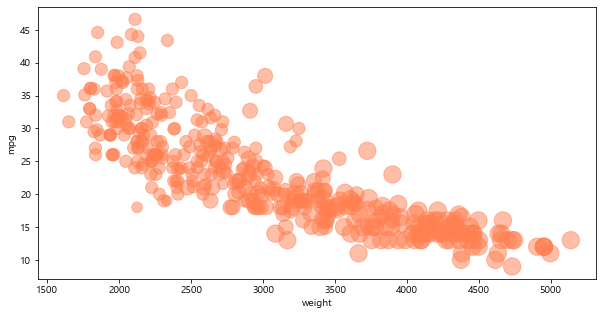

In [82]:
# s = 'series_Data'


auto_mpg_frm.plot(kind = 'scatter' , x = 'weight' , y = 'mpg' 
                  , color = 'coral' , figsize = (10,5) , alpha = 0.5
                  , s = cylinder_size)
plt.savefig('scatter.png')
plt.show()
plt.close()

In [83]:
mpg_frm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 양적 자료의 데이터 분포 확인 - boxplot
- 수치(값)이 들어있는 자료

In [84]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


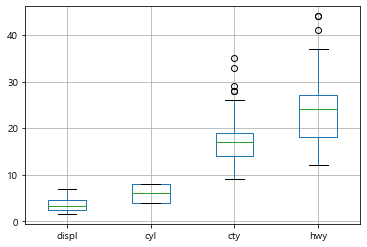

In [86]:
mpg_frm[['displ' , 'cyl' , 'cty' , 'hwy']].boxplot()
plt.show()
plt.close()

In [87]:
### 질적 자료에 대한 데이터 빈도 확인 -  value_counts()

In [88]:
mpg_frm['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [89]:
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4이하인 자동차와 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 높은가

In [94]:
print(mpg_frm.query('displ <= 4')['hwy'].mean())
print(mpg_frm.query('displ >= 5')['hwy'].mean())

25.96319018404908
18.07894736842105


In [96]:
# audi와 toyota 중 어느 manufactere의 cty가 평균적으로 더 높은가


In [108]:
mpg_frm.groupby('manufacturer').agg(np.mean).loc[['audi' , 'toyota']].cty

manufacturer
audi      17.611111
toyota    18.529412
Name: cty, dtype: float64

In [ ]:
### query
# dataframe.query(boolean)

In [ ]:
# chevrolet ford honda 자동차의 고속도로 연비 평균
# 이 회사들의 데이터를 추출한 후  hwy 전체 평균

In [107]:
mpg_frm.groupby('manufacturer').agg(np.mean).loc[['chevrolet' , 'ford' , 'honda']].hwy

manufacturer
chevrolet    21.894737
ford         19.360000
honda        32.555556
Name: hwy, dtype: float64

In [111]:
# list를 참조(@) 하는 query 구문

manufacturer_list = ['chevrolet' , 'ford' , 'honda']
mpg_frm.query('manufacturer in @manufacturer_list')['hwy'].mean()

22.50943396226415

In [112]:
print('연료가격 변수 추가(price_fl) - ')
print('c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22')
print('연료가격에 대한 병합 merge')

연료가격 변수 추가(price_fl) - 
c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22


In [253]:
price_fl = pd.DataFrame({'fl' : ['c','d','e','p','r'] ,
                         'price_fl' : [2.35 , 2.38 , 2.11 , 2.76 , 2.22]
                        })
price_fl

merge_mpg_frm = pd.merge(mpg_frm , price_fl , how = 'inner' , on = 'fl')
#merge_mpg_frm


In [168]:
# 데이터 전처리 과정에서 결측값 확인하기


In [199]:
merge_mpg_frm.isnull()
merge_mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl      234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [213]:
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
merge_mpg_frm.groupby('drv').agg(np.mean)[['hwy']]


,hwy
drv,
4,18.752577
f,28.726190
r,20.047619


In [255]:
merge_mpg_frm_01 = merge_mpg_frm

In [256]:
merge_mpg_frm_02 = merge_mpg_frm

In [241]:
#merge_mpg_frm_01['hwy']==26
merge_mpg_frm_01.query('hwy == 26')['hwy'] = None

In [257]:
# answer
for idx in range(0,234,7):
    merge_mpg_frm_02.loc[idx , 'hwy'] = np.NaN

merge_mpg_frm_02.info()
merge_mpg_frm_02.isna().sum()
merge_mpg_frm_02['hwy'].isna().sum()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           200 non-null    float64
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl      234 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 31.9+ KB


34

In [251]:
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
# dropna = 결측값 제거

In [260]:
drop_merge_mpg_frm = merge_mpg_frm_02[['drv','hwy']].dropna()
drop_merge_mpg_frm

,drv,hwy
1,f,29.0
2,f,31.0
3,f,30.0
4,f,26.0
5,f,26.0
...,...,...
228,4,17.0
229,4,22.0
230,f,44.0
232,f,41.0


In [263]:
data = drop_merge_mpg_frm.groupby('drv').mean().sort_values(by='hwy' , ascending = False)
data

,hwy
drv,
f,27.921348
r,20.772727
4,19.235955


<AxesSubplot:xlabel='drv'>

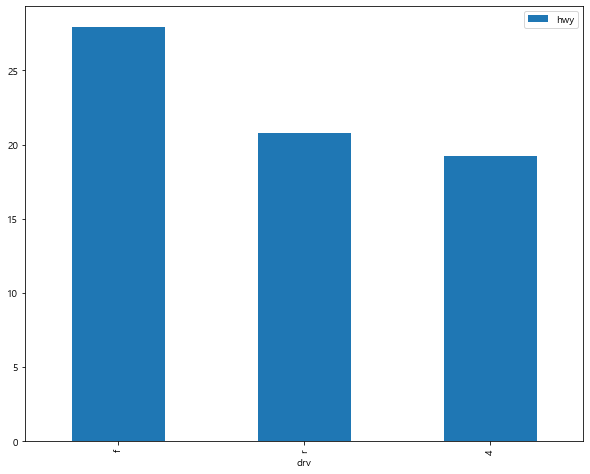

In [268]:
# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자

data.plot(kind='bar' , figsize = (10 , 8) )

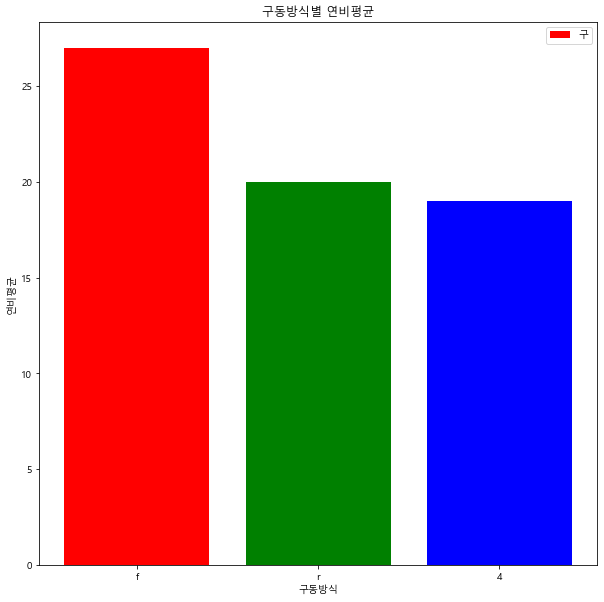

In [311]:
plt.figure(figsize = (10,10))
# plt.bar(data.index.astype(str) , data.values.reshape(-1).astype(int))
plt.bar(np.arange(3) , data.values.reshape(-1).astype(int) , color = ['red' , 'green' , 'blue'])
plt.title('구동방식별 연비평균')
plt.xlabel('구동방식')
plt.ylabel('연비평균')
plt.xticks(np.arange(3) , data.index.values)

plt.legend(loc = 'best' , labels = '구동방식')
plt.show()
plt.close()



In [240]:
merge_mpg_frm_01['hwy'][merge_mpg_frm_01['hwy']==26] = None
merge_mpg_frm_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           202 non-null    float64
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl      234 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.8+ KB


In [239]:
merge_mpg_frm_01.fillna(int(26))

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22.0,d,suv,2.38
230,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44.0,d,compact,2.38
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact,2.38


In [313]:
# 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
# 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자


In [352]:
fl_cty_hwy_frm = mpg_frm.dropna().groupby('drv').agg(np.mean)[['cty' , 'hwy']]
fl_cty_hwy_frm

,cty,hwy
drv,,
4,14.330097,19.174757
f,19.971698,28.160377
r,14.080000,21.000000


Text(0.5, 1.0, '고속도로, 도시연비 평균')

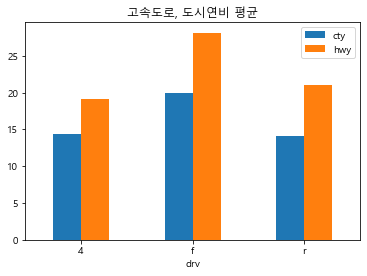

In [355]:
drv_cty_hwy_frm = mpg_frm.dropna().groupby('drv').agg(np.mean)[['cty' , 'hwy']]
drv_cty_hwy_frm

drv_cty_hwy_frm.plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('고속도로, 도시연비 평균')

In [328]:
fl_cty_hwy_frm['cty'].index
fl_cty_hwy_frm['cty'].values

array([24.        , 25.6       ,  9.75      , 17.36538462, 16.73809524])

<BarContainer object of 3 artists>

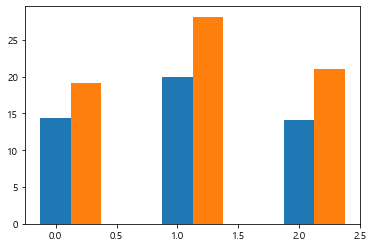

In [363]:
plt.figure()
plt.bar(np.arange(3) , fl_cty_hwy_frm['cty'].values , width = 0.25)
plt.bar(np.arange(3)+0.25 , fl_cty_hwy_frm['hwy'].values , width = 0.25)


In [364]:
# 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자(나중에)

# 값의 종류별 빈도수 검사


In [372]:
value_cnt_series = mpg_frm['class'].value_counts()
mpg_frm.groupby('class').size()

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

In [376]:
value_cnt_series.values

array([62, 47, 41, 35, 33, 11,  5], dtype=int64)

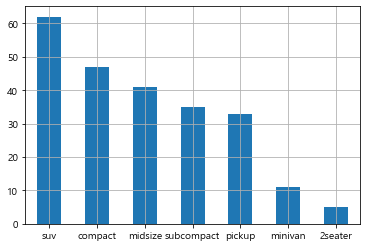

In [381]:
# plt.grid 눈금 그리기

value_cnt_series.plot(kind='bar')
plt.xticks(rotation = 0)
plt.grid()
plt.show()
plt.close()

In [428]:
# 어떤 회사에서 생산한 suv 차종의 도시 연니가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자(나중에)


In [432]:
mpg_frm['class'] == 'suv'

1      False
2      False
3      False
4      False
5      False
       ...  
230    False
231    False
232    False
233    False
234    False
Name: class, Length: 234, dtype: bool

In [442]:
# mpg_frm.query('manufacturer in @manufacturer_list')['hwy'].mean()
mpg_frm.rename(columns = {'class' : 'grade'} , inplace = True)
mpg_frm.query('grade == "suv"').groupby('manufacturer').agg(np.mean)['cty'].sort_values(ascending=False).head(5)

manufacturer
subaru     18.833333
toyota     14.375000
nissan     13.750000
jeep       13.500000
mercury    13.250000
Name: cty, dtype: float64

manufacturer
subaru     18.833333
toyota     14.375000
nissan     13.750000
jeep       13.500000
mercury    13.250000
Name: cty, dtype: float64

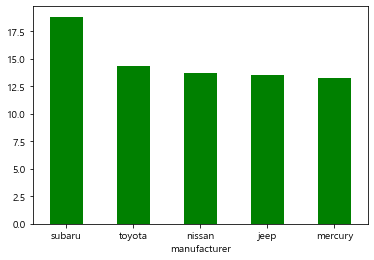

In [444]:
mpg_frm
Top_five = mpg_frm[mpg_frm['grade']=='suv'].groupby('manufacturer').agg(np.mean)['cty'].sort_values(ascending=False).head(5)
display(Top_five)
Top_five.plot(kind = 'bar' , color = 'green')
plt.xticks(rotation = 0)

plt.show()
plt.close()

- pie plot
- 카테코리별 값의 상대적 비교를 해야할 경우

In [445]:
labels = ['라면' , '샐러드' , '샌드위치' , '잡채' , '생고기']
sizes = [15,15,20,25,25]
colors = ['gold' , 'blue' , 'red' , 'yellow' , 'green']

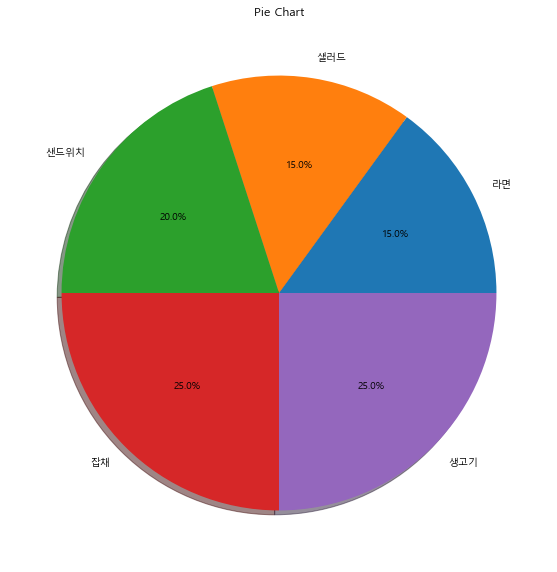

In [459]:
# autopct='%1.1f%%' format 퍼센트 (%정수 자리 개수 + . + 소수 자리 개수 + 자료형 %%)


plt.figure(figsize = (10,10))
plt.pie(sizes, labels = labels , autopct='%1.1f%%' , shadow = True)
plt.title('Pie Chart' )
plt.show()
plt.close()

In [465]:
auto_mpg_frm.groupby('origin').size().

origin
1    249
2     70
3     79
dtype: int64

In [ ]:
# 데이터의 개수 카운트를 위해서 1을 가진 열 추가
# 제조국가 값을 나라명으로 변경 1 : 미국 , 2: 대한민국 , 3: 중국
# 제조국에 대한 파이차트 그리기
# 범례 표현하기


In [469]:
auto_mpg_frm['cnt'] = 1
auto_mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [491]:
df = {'origin' : [1,2,3] ,
     'country' : ['미국' , '대한민국' , '중국']}
data = pd.DataFrame(df)
auto_merge_frm = pd.merge(auto_mpg_frm , data , how = 'inner' , on = 'origin')
auto_merge_frm['origin'] = auto_merge_frm['country']
auto_merge_frm.drop('country' , axis = 1 , inplace=True)

pie_auto = auto_merge_frm.groupby('origin').sum()
pie_auto.values

pie_auto['cnt']

origin
대한민국     70
미국      249
중국       79
Name: cnt, dtype: int64

In [ ]:
merge_mpg_frm = pd.merge(mpg_frm , price_fl , how = 'inner' , on = 'fl')

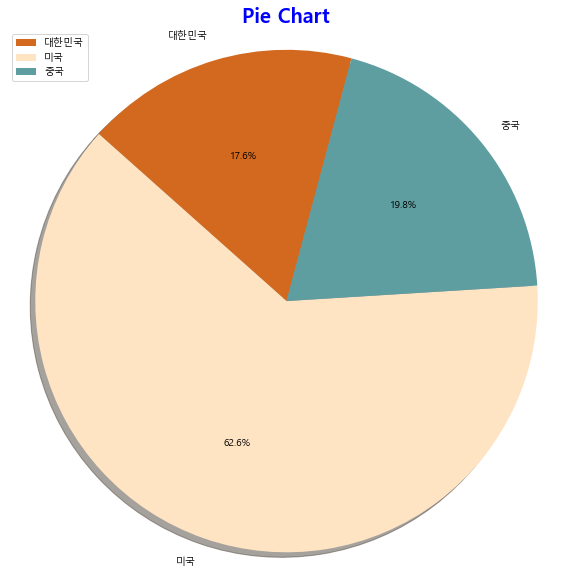

In [508]:
# , textprops={'fontsize': 18}
plt.figure(figsize=(10,10))
plt.pie(pie_auto['cnt'] , labels = pie_auto['cnt'].index , autopct='%1.1f%%' , shadow = True 
       , colors = ['chocolate' , 'bisque' , 'cadetblue' ] , startangle = 75)
plt.title('Pie Chart' , size = 20 , weight ='bold' , color = 'blue' )
plt.axis('equal')
plt.legend(loc = 'best')
plt.show()
plt.close()

- hist plot : 구간에 대한 데이터의 집계

In [510]:
auto_mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   cnt           398 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


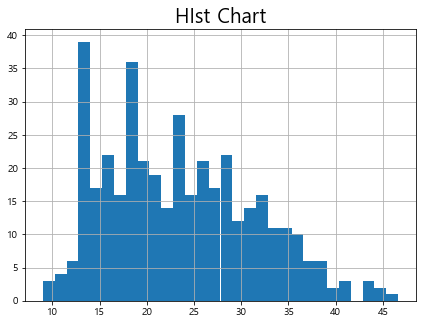

In [520]:
# 연비(mpg) 열에 대한 히스토그램을 시각화
# bins = num 생성할 막대 개수

auto_mpg_frm['mpg']
plt.figure(figsize = (7,5))
plt.hist(auto_mpg_frm['mpg'] , bins = 30)

plt.title('HIst Chart' , size = 20)
plt.grid()
plt.show()
plt.close()

In [522]:
 mpg_frm

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,grade
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# strip() : 특정 문자열에서 특정 문자를 drop시킴